## Exam 2 (Due April 20, 2020 at 11:59 pm)

Please read each question carefully and apply the necessary exploratory analysis to each data set, as well as test for the assumptions relevant to each method when appropriate.

Write the answers in the space provided below each question.

### $1$. Small sample sizes affects accuracy of a t-test because the distribution resembles a normal distribution.

a. True

b. False

False. Sample size affects t-test accuracy but small samples are often NOT normally distributed, and that is why t-tests are used in the first place instead of the z-test. T-tests will still work with small, non-normal distributions, but their power will be less.

### $2$. Data on 102 male and 100 female athletes were collected at the Australian Institute of Sport. The data are  in the file ais.txt.

Develop a logistic regression model for gender ( y = 1 corresponds to female) or ( y = 0 corresponds to male) based on the following predictors (which is a subset of those available):

- RCC, read cell count
- WCC, white cell count
- BMI, body mass index
 
Remember to check for the model assumptions.

### Logistic regression model assumptions:

**1. Logistic regression requires the dependent variable to be binary.**

In this case, we are creating a model where gender is the dependent variable, and we have specified the outcome to be 0 or 1. So this assumption is met.



**2. Logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.**

I would assume this is the case for this data. We are not looking at the data in the terms of time lapses or anything like that. It is one entry per athlete. So this assumption has been met.



**3. Logistic regression requires there to be no multicollinearity among the independent variables.**

RBC, WBC, and BMI are not correlated *too* strongly with each other (there have been studies that show a relationship between BMI and RBC). They are not different measures of the same thing (like blood pressure measurements) so I think we are safe here.



**4. Logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.**

To check this, we can check the p-values of the coefficients. If the p-values are small enough, then we reject the hypothesis of these coefficients being zero. Meaning the linearity with log odds hold in the population. They are in the print out of the summary of the log model. The only one that isn't <0.05 is WCC, so I think it's actually okay to throw that one out to help the model perform more efficiently.


**5. Logistic regression typically requires a large sample size.  A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model.**

We definitely have this! We have >100 of each outcome.

In [1]:
library(dplyr)
library(ggplot2)
library(mosaic)

data = read.delim2("ais.txt", header = TRUE, sep = " ", dec = ".",)

# create model
logreg <- glm(Sex ~ RCC + WCC + BMI, family = "binomial", data = data) 
summary(logreg)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



ERROR: Error in library(mosaic): there is no package called ‘mosaic’


In [ ]:
# use model to make predictions

rcc <- range(~RCC, data = data, na.rm = TRUE)
wcc <- range(~WCC, data = data, na.rm = TRUE)
bmi <- range(~BMI, data = data, na.rm = TRUE)
res <- 10

fake_grid <- expand.grid(
  RCC = seq(from = rcc[1], to = rcc[2], length.out = res), 
  BMI = seq(from = bmi[1], to = bmi[2], length.out = res),
  WCC = seq(from = wcc[1], to = wcc[2], length.out = res)
) 

y_hats <- fake_grid %>%
  mutate(y_hat = predict(logreg, newdata = ., type = "response"))

In [ ]:
# plot the model

# based on the coefficients from the model, RCC has the strongest effect so I will use this for my x axis
log_plot <- ggplot(data = y_hats, aes(x = RCC, y = y_hat)) + 
  geom_jitter(alpha = 0.1, height = 0.05) + 
  geom_smooth(method = "glm", method.args = list(family = "binomial")) + 
  ylab("Sex")
log_plot + xlab("RCC")

### $3$. If scores are normally distributed with a mean of 42 and a standard deviation of 8, what percent of the scores is: 

(a) greater than 25? 

(b) smaller than 31? 

(c) between 25 and 31?

In [2]:
# 3a
pnorm(25, mean = 42, sd = 8, lower.tail=FALSE)


[1] 0.9832067

In [3]:
# 3b
pnorm(31, mean = 42, sd = 8, lower.tail=TRUE)


[1] 0.08456572

In [4]:
# 3c
1 - (pnorm(25, mean = 42, sd = 8, lower.tail=TRUE) + pnorm(31, mean = 42, sd = 8, lower.tail=FALSE))

[1] 0.06777242

### $4$. From the following table:
![title](table1.png)

a. Apply the appropiate tests to evaluate the null hypothesis that there is no difference in the noise values means at different vehicle sizes. 

b. Examine all assumptions related to the test and make sure that the data follows all of those assumptions.

**ANOVA assumptions:**

1. The observations are obtained independently and randomly from the population defined by the factor levels


I assume this is true

2. The data of each factor level are normally distributed.


Again, assuming large enough sample size, this should be true

**ANOVA test hypotheses:**

Null hypothesis: the means of the different groups are the same
Alternative hypothesis: At least one sample mean is not equal to the others.

In [5]:
small = c(810, 820, 820, 835, 835, 835)
medium = c(840, 840, 840, 845, 855, 850)
large = c(785, 790, 785, 760, 760, 770)

dat = data.frame("Noise" = c(810, 820, 820, 835, 835, 835, 840, 840, 840, 
                              845, 855, 850, 785, 790, 785, 760, 760, 770),
                  "Size" = c("small","small","small","small","small","small",
                            "medium","medium","medium","medium","medium","medium",
                            "large","large","large","large","large","large"))

# anova
res.aov <- aov(Noise ~ Size, data = dat)

summary(res.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Size         2  15703    7851   70.49 2.36e-08 ***
Residuals   15   1671     111                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

p-val is <<0.05, we have evidence to support the alternate hypothesis, ie there is a significant difference in the mean noise level of at least one group.

### $5$. From the BABNEW.dta dataset use the appropiate statistical test to evaluate difference in birth weight (bweight)  as a function of gender (sex). 

Solve the exercise manually using the steps given in lecture and then confirm the results with the R function.

In [6]:
library(foreign)
library(tidyverse)
library(dplyr)
babnew <- read.dta("./BABNEW.dta", convert.factors = T)
library(magrittr)
head(babnew)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ tibble  2.1.3     ✔ purrr   0.3.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



id,matage,ht,gestwks,sex,bweight,matagegp,gestcat
1,33,no,37.74,female,2410,2,2
2,34,no,39.15,female,2977,2,2
3,34,no,35.72,female,2100,2,1
4,30,no,39.29,male,3270,2,2
5,35,no,38.38,female,2620,3,2
6,37,no,37.86,male,3260,3,2


In [7]:
male = babnew$sex == "male"
male_bab = babnew[male,]

female = babnew$sex == "female"
fem_bab = babnew[female,]

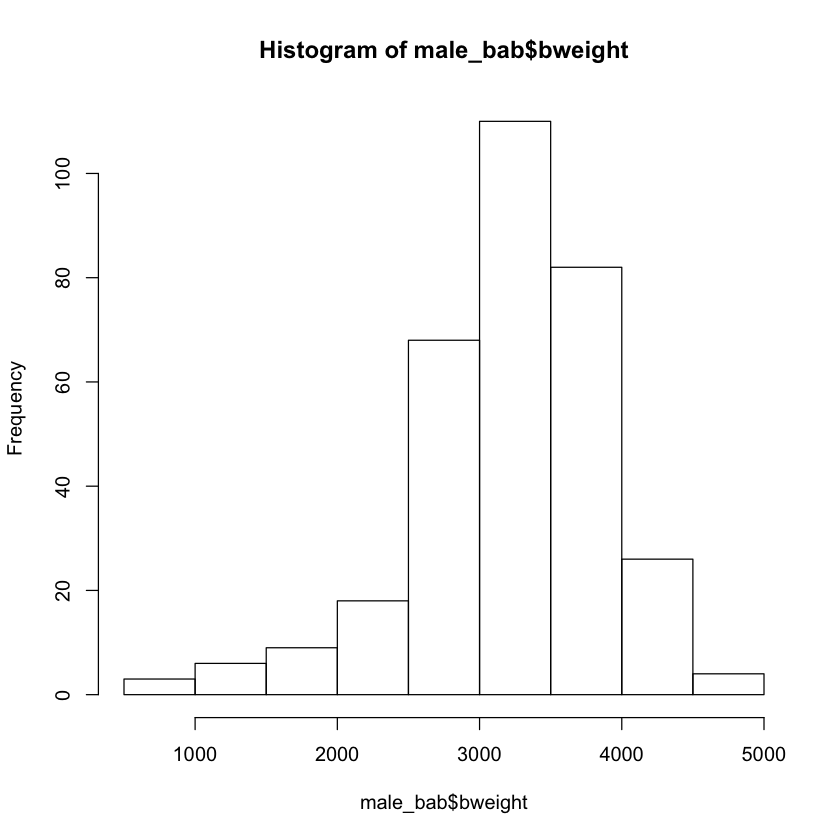

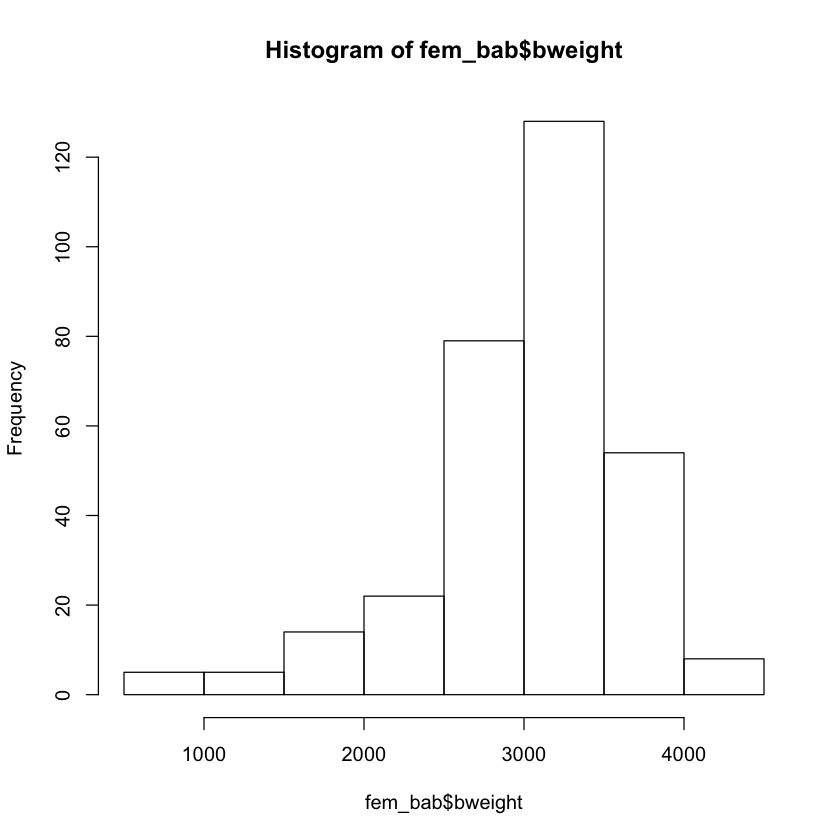

In [8]:
# both look to be normally distributed with slight left skew --preemies? :'(

hist(male_bab$bweight) 
hist(fem_bab$bweight) 

In [9]:
male_bweights = male_bab$bweight
female_bweights = fem_bab$bweight

x1 = mean(male_bweights)
x2 = mean(female_bweights)
s1 = sd(male_bweights)
s2 = sd(female_bweights)
n1 = length(male_bweights)
n2 = length(female_bweights)

# check variance (they're different, will need to use Welch's T Test)
v1 = s1^2
print(v1)
v2 = s2^2
print(v2)

# Standard Error
SE = sqrt(((s1^2)/n1) + ((s2^2)/n2))
SE

# Degrees of Freedom
DF = (((s1^2)/n1 + (s2^2)/n2))^2 / (((s1^2 / n1)^2 / (n1 - 1)) + (((s2^2 / n2)^2) / (n2 - 1)))
DF

# d is the difference between the two means, I'll just set to 0
d = 0
t = (x1 - x2 - 0) / SE 
t
#  t < table value, p is significant

[1] 443529
[1] 395213.8


[1] 51.13869

[1] 638.6541

[1] 3.268605

In [10]:
# the easy way:

x = male_bweights
y = female_bweights
t.test(x,y)


	Welch Two Sample t-test

data:  x and y
t = 3.2686, df = 638.65, p-value = 0.001139
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  66.73186 267.57246
sample estimates:
mean of x mean of y 
 3211.279  3044.127 


### $6$. The following data reports the calorie content of beef hot dogs. Here are the numbers of calories of a random sample of 20 different hot dogs:

186, 181, 176, 149, 184, 190, 158, 139, 175, 148, 152, 111, 141, 153, 190, 157, 131, 149, 135, 132.

Assume that these numbers are the observed values from a random sample of twenty independent normal random variables with mean μ and variance σ2, both unknown. Find the 90% confidence intervals for the mean number of calories μ.

$(\bar{x} - t_{n-1,1_{-\alpha/2}}s/\sqrt{n},\bar{x} + t_{n-1,1_{-\alpha/2}}s/\sqrt{n}) $

 
$t_{n-1} = \frac {\bar{x} - \mu}{s/\sqrt{n}}$

In [11]:
dogs = c(186, 181, 176, 149, 184, 190, 158, 139, 175, 148, 152, 111, 141, 153, 190, 157, 131, 149, 135, 132)

xbar = mean(dogs)

xvar = var(dogs)
s = sqrt(xvar)

alpha = 0.1
n = 20

(xbar+qt(1-(alpha/2),n-1)*(s/sqrt(n)))   # upper bound
(xbar-qt(1-(alpha/2),n-1)*(s/sqrt(n)))   # lower bound

[1] 165.6044

[1] 148.0956

### $7$. Which type of predictor variables can be included in a General Linear Model

a. Logistic

b. Normal

c. Categorical

d. continuous

e. Mixed


The predictor variables should be continuous if you're talking about a general linear model (linear regression). If you mean generalized linear model, you can use categorical or continuous variables.

### $8$. The file anscombe.txt contains 4 different datasets constructed by Anscombe in 1973. The x and y variables are matched to each dataset respectively (e.g. x1 corresponds to y1, etc). 
#### A. Produce a Simple linear regression for each dataset (a scatterplot might also help you to see the differences). 
#### B. Write the resulting linear function for each model. 
#### C. Generate residuals plots 
#### D. In a few sentences discuss each model and what might be the problem (if any) with that model and what can be done to fix it.

In [12]:
df = read.delim("anscombe.txt", header = TRUE, sep="")
df

case,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04
7,6,6,6,8,7.24,6.13,6.08,5.25
8,4,4,4,19,4.26,3.10,5.39,12.50
9,12,12,12,8,10.84,9.13,8.15,5.56
10,7,7,7,8,4.82,7.26,6.42,7.91



Call:
lm(formula = df$y1 ~ df$x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92127 -0.45577 -0.04136  0.70941  1.83882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0001     1.1247   2.667  0.02573 * 
df$x1         0.5001     0.1179   4.241  0.00217 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6665,	Adjusted R-squared:  0.6295 
F-statistic: 17.99 on 1 and 9 DF,  p-value: 0.00217


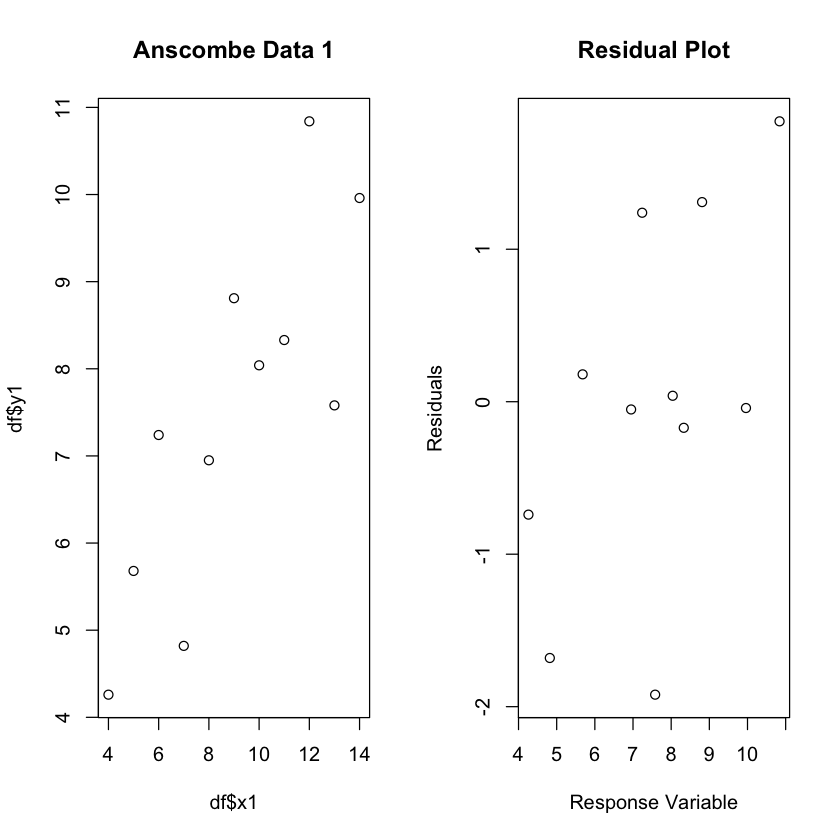

In [13]:
model1 <- lm(df$y1 ~ df$x1) 
summary(model1)

mod1.res <- resid(model1)

par(mfrow=c(1,2))
plot(df$x1, df$y1, main="Anscombe Data 1")
plot(x = df$y1, y = mod1.res, ylab="Residuals", xlab="Response Variable", main="Residual Plot")


**Discussion:** This model shows a weak positive correlation (R^2 is 0.6295) with a p value < 0.05. I think a linear model is a decent choice for this data, it's just that the data itself isn't showing a particularly powerful correlation.  


Call:
lm(formula = df$y2 ~ df$x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9009 -0.7609  0.1291  0.9491  1.2691 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    3.001      1.125   2.667  0.02576 * 
df$x2          0.500      0.118   4.239  0.00218 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6662,	Adjusted R-squared:  0.6292 
F-statistic: 17.97 on 1 and 9 DF,  p-value: 0.002179


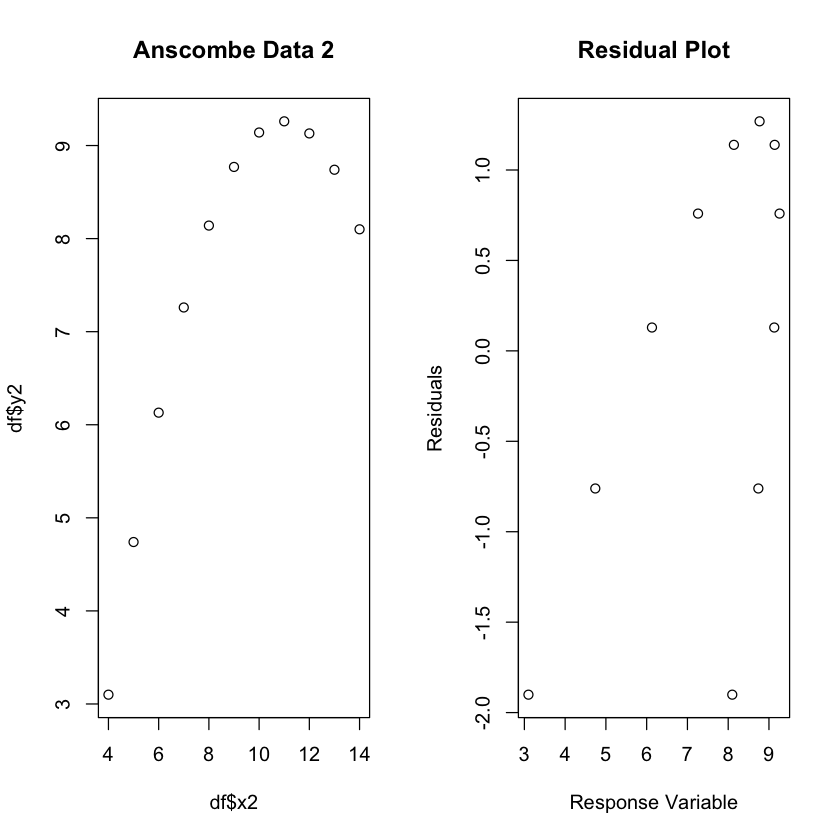

In [14]:
model2 <- lm(df$y2 ~ df$x2) 
summary(model2)
mod2.res <- resid(model2)

par(mfrow=c(1,2))
plot(df$x2, df$y2, main="Anscombe Data 2")
plot(x = df$y2, y = mod2.res, ylab="Residuals", xlab="Response Variable", main="Residual Plot")



**Discussion:** This looks kind of like a normal distribution that has been cut slightly to the right of the curve's peak, so you could try using a function based on the Gaussian distribution to get a better fit. Linear regression is giving us almost the same R^2 value as the first dataset, but when you look at scatter plot, it's pretty clear that it's not the best choice. 


Call:
lm(formula = df$y3 ~ df$x3)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1586 -0.6146 -0.2303  0.1540  3.2411 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0025     1.1245   2.670  0.02562 * 
df$x3         0.4997     0.1179   4.239  0.00218 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.236 on 9 degrees of freedom
Multiple R-squared:  0.6663,	Adjusted R-squared:  0.6292 
F-statistic: 17.97 on 1 and 9 DF,  p-value: 0.002176


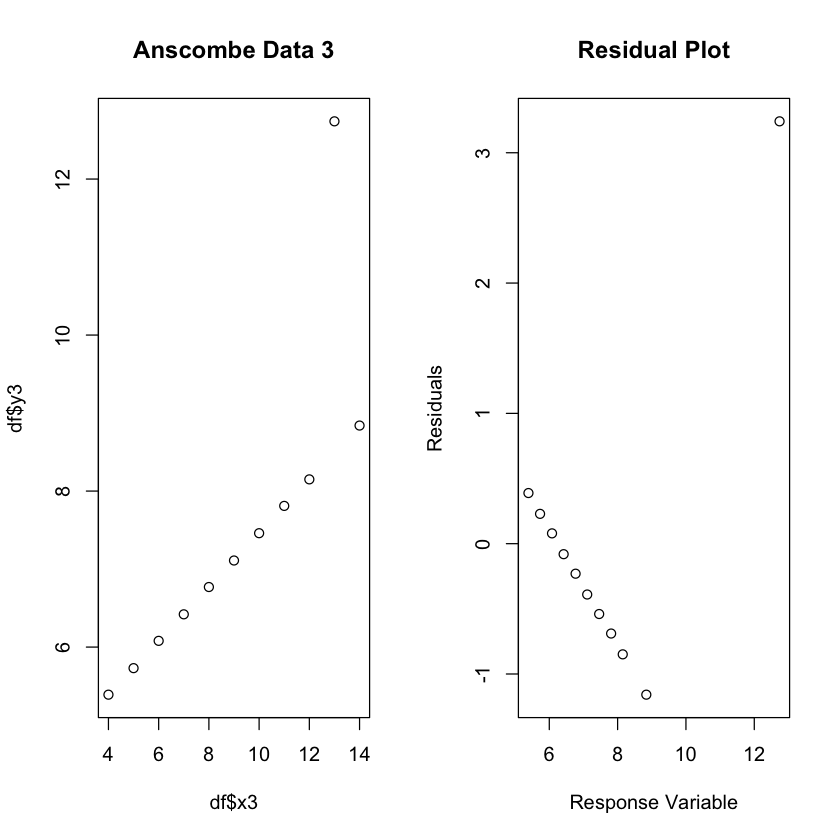

In [15]:
model3 <- lm(df$y3 ~ df$x3) 
summary(model3)

mod3.res <- resid(model3)

par(mfrow=c(1,2))
plot(df$x3, df$y3, main="Anscombe Data 3")
plot(x = df$y3, y = mod3.res, ylab="Residuals", xlab="Response Variable", main="Residual Plot")



**Discussion**: Again, a very similar R^2 value to the ones above. When you look at the scatter plot, you can see why the linear regression is faltering on what seems like a perfect data set. There is one outlier that has a much higher value for the response variable than what you would expect. You could remove that and get a perfect fit (or near perfect) with the linear regression. 


Call:
lm(formula = df$y4 ~ df$x4)

Residuals:
   Min     1Q Median     3Q    Max 
-1.751 -0.831  0.000  0.809  1.839 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0017     1.1239   2.671  0.02559 * 
df$x4         0.4999     0.1178   4.243  0.00216 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.236 on 9 degrees of freedom
Multiple R-squared:  0.6667,	Adjusted R-squared:  0.6297 
F-statistic:    18 on 1 and 9 DF,  p-value: 0.002165


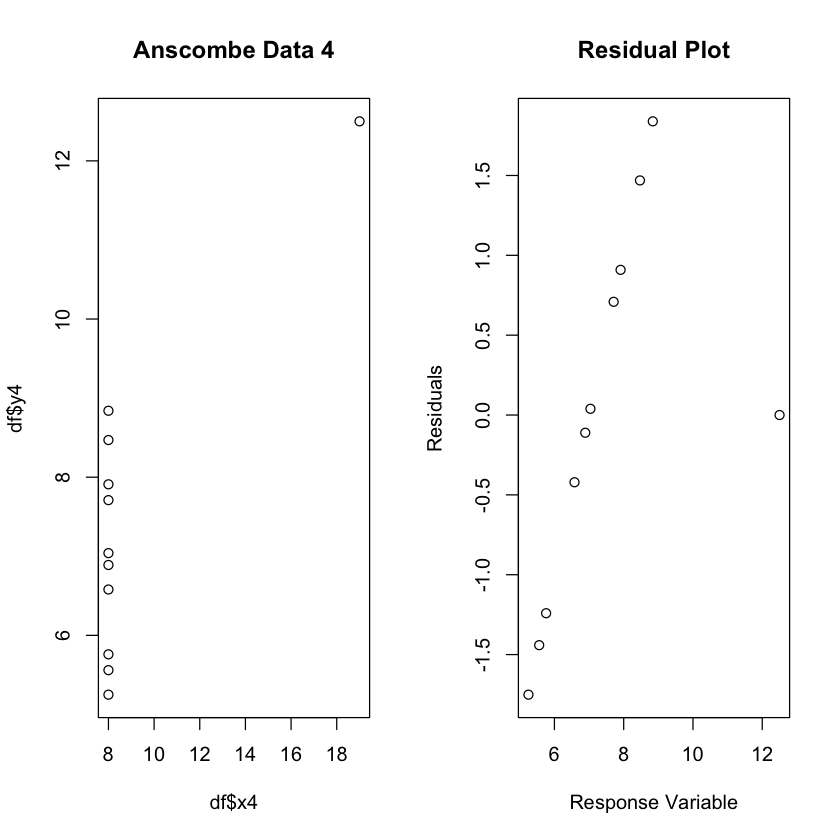

In [16]:
model4 <- lm(df$y4 ~ df$x4) 
summary(model4)


mod4.res <- resid(model4)

par(mfrow=c(1,2))
plot(df$x4, df$y4, main="Anscombe Data 4")
plot(x = df$y4, y = mod4.res, ylab="Residuals", xlab="Response Variable", main="Residual Plot")



**Discussion:** We have a kind of similar situation as to the one we saw right above. Again, same R^2 value, and an almost perfect line with one outlier that is messing it up. The predictor variable is at 18, when all the others were at 8. If that one outlier was removed, you would have a perfect fit with a vertical line at x = 8. 